In [201]:
from functools import wraps
from time import time,sleep
import numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification,make_regression
from sklearn.model_selection import train_test_split

## Timing decorator with `functools.wraps`

In [235]:
def timing(func):
    @wraps(func)
    def wrap(*args, **kw):
        ts = time()
        result = func(*args, **kw)
        te = time()
        tdelta = round(1000*(te-ts),3)
        print (f"Function '{func.__name__}' took {tdelta} milliseconds to run")
        return result
    return wrap

In [20]:
@timing
def list_length(a):
    if isinstance(a,list):
        sleep(0.1)
        s = len(a)
        return s
    else:
        print("Argument is not a list")

In [21]:
list_length([1,2,3])

Function 'list_length' took 111.291 milliseconds to run


3

In [22]:
list_length(5)

Argument is not a list
Function 'list_length' took 0.0 milliseconds to run


In [23]:
def time_return(func):
    @wraps(func)
    def wrap(*args, **kw):
        ts = time()
        result = func(*args, **kw)
        te = time()
        tdelta = round(1000*(te-ts),3)
        return tdelta
    return wrap

In [135]:
@time_return
def numpy_matmul(a,b):
    return (np.matmul(a,b))

In [140]:
SIZE = 1000
a = np.random.beta(1.0,2.0,size=(SIZE,SIZE))
b = np.random.beta(1.0,2.0,size=(SIZE,SIZE))
numpy_matmul(a,b)

16.48

In [141]:
SIZE = 2000
a = np.random.beta(1.0,2.0,size=(SIZE,SIZE))
b = np.random.beta(1.0,2.0,size=(SIZE,SIZE))
numpy_matmul(a,b)

111.301

In [143]:
SIZE = [500,1000,2000,3000,4000,5000]
for s in SIZE:
    a = np.random.beta(1.0,2.0,size=(s,s))
    b = np.random.beta(1.0,2.0,size=(s,s))
    t = numpy_matmul(a,b)
    print(f"Matrix multiplication of size ({s}x{s}) took {t} milliseconds")

Matrix multiplication of size (500x500) took 3.0 milliseconds
Matrix multiplication of size (1000x1000) took 17.031 milliseconds
Matrix multiplication of size (2000x2000) took 111.501 milliseconds
Matrix multiplication of size (3000x3000) took 359.307 milliseconds
Matrix multiplication of size (4000x4000) took 835.614 milliseconds
Matrix multiplication of size (5000x5000) took 1611.042 milliseconds


## Throwing an ML estimator into the mix

In [144]:
def time_estimator(func):
    @wraps(func)
    def wrap(*args, **kw):
        ts = time()
        result = func(*args, **kw)
        te = time()
        tdelta = round(1000*(te-ts),3)
        return (tdelta, result)
    return wrap

In [178]:
@time_estimator
def classifier_accuracy(estimator,x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=42)
    estimator.fit(X_train,y_train)
    score = estimator.score(X_test,y_test)
    return round(score,3)

In [179]:
data = make_classification(n_samples=1000,n_features=20,n_informative=20,n_redundant=0,
                           flip_y=0.05,class_sep=1.5)
x,y = data[0],data[1]

In [180]:
log_model = LogisticRegressionCV()

In [181]:
classifier_accuracy(log_model,x,y)

(312.083, 0.836)

## Change the data and record execution time

In [176]:
SIZE = [1000+500*i for i in range(21)]
log_model = LogisticRegressionCV()
model_time, model_acc = [],[]

for s in SIZE:
    data = make_classification(n_samples=s,n_features=20,n_informative=20,n_redundant=0,
                               flip_y=0.05,class_sep=1.5)
    x,y = data[0],data[1]
    m_time, m_acc = classifier_accuracy(log_model,x,y)
    model_time.append(m_time)
    model_acc.append(m_acc)

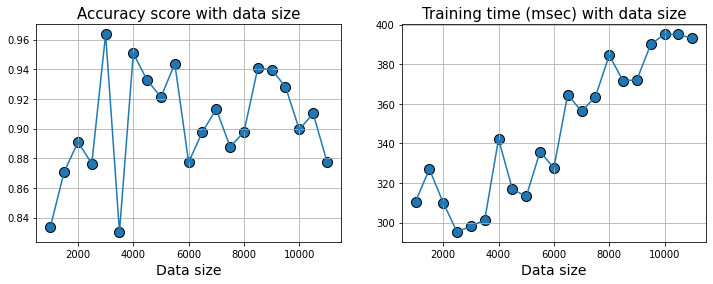

In [177]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(SIZE,model_acc,edgecolor='k',s=100)
ax[0].plot(SIZE,model_acc)
ax[0].set_title("Accuracy score with data size",fontsize=15)
ax[0].set_xlabel("Data size",fontsize=14)
ax[0].grid(True)
ax[1].scatter(SIZE,model_time,edgecolor='k',s=100)
ax[1].plot(SIZE,model_time)
ax[1].set_title("Training time (msec) with data size",fontsize=15)
ax[1].set_xlabel("Data size",fontsize=14)
ax[1].grid(True)
plt.show()

## Change the model and optimize

In [229]:
num_trees = [5*x for x in range(1,21)]
model_time, model_acc = [],[]
data = make_classification(n_samples=1000, n_features=20, 
                           n_informative=20, n_redundant=0, 
                           flip_y=0.05,class_sep=1.0)
x,y = data[0],data[1]
for n in num_trees:
    rf_model = RandomForestClassifier(n_estimators=n)
    m_time, m_acc = classifier_accuracy(rf_model,x,y)
    model_time.append(m_time)
    model_acc.append(m_acc)

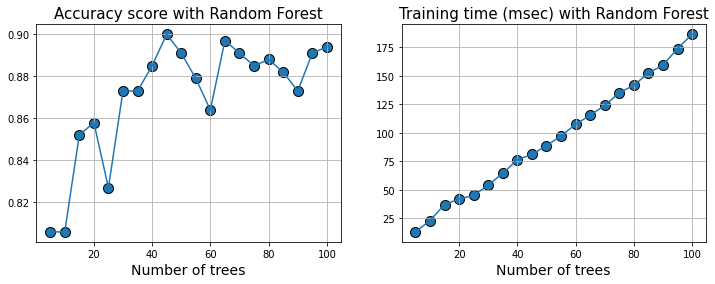

In [232]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(num_trees,model_acc,edgecolor='k',s=100)
ax[0].plot(num_trees,model_acc)
ax[0].set_title("Accuracy score with Random Forest",fontsize=15)
ax[0].set_xlabel("Number of trees",fontsize=14)
ax[0].grid(True)
ax[1].scatter(num_trees,model_time,edgecolor='k',s=100)
ax[1].plot(num_trees,model_time)
ax[1].set_title("Training time (msec) with Random Forest",fontsize=15)
ax[1].set_xlabel("Number of trees",fontsize=14)
ax[1].grid(True)
plt.show()

In [233]:
model_time = np.array(model_time)
model_acc = np.array(model_acc)
model_opt = model_acc + 1/model_time

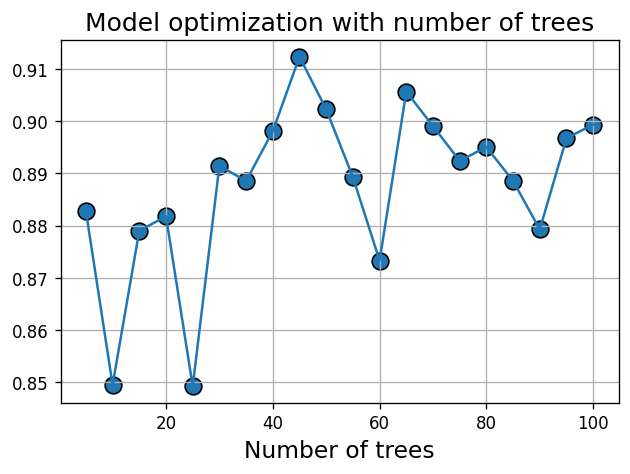

In [236]:
plt.figure(dpi=120)
plt.title("Model optimization with number of trees", fontsize=15)
plt.plot(num_trees,model_opt)
plt.scatter(num_trees,model_opt,s=100,edgecolor='k')
plt.xlabel("Number of trees",fontsize=14)
plt.grid(True)
plt.show()